<a href="https://colab.research.google.com/github/eugenefauntleroy/freedom_index/blob/main/freedom_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.cm as cm

In [8]:
rsf_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desktop_data/DATA/RSB_DataSet.csv')
score_columns = ['Score', 'Political Context', 'Economic Context', 'Legal Framework', 'Safety Score', 'Sociocultural Context']


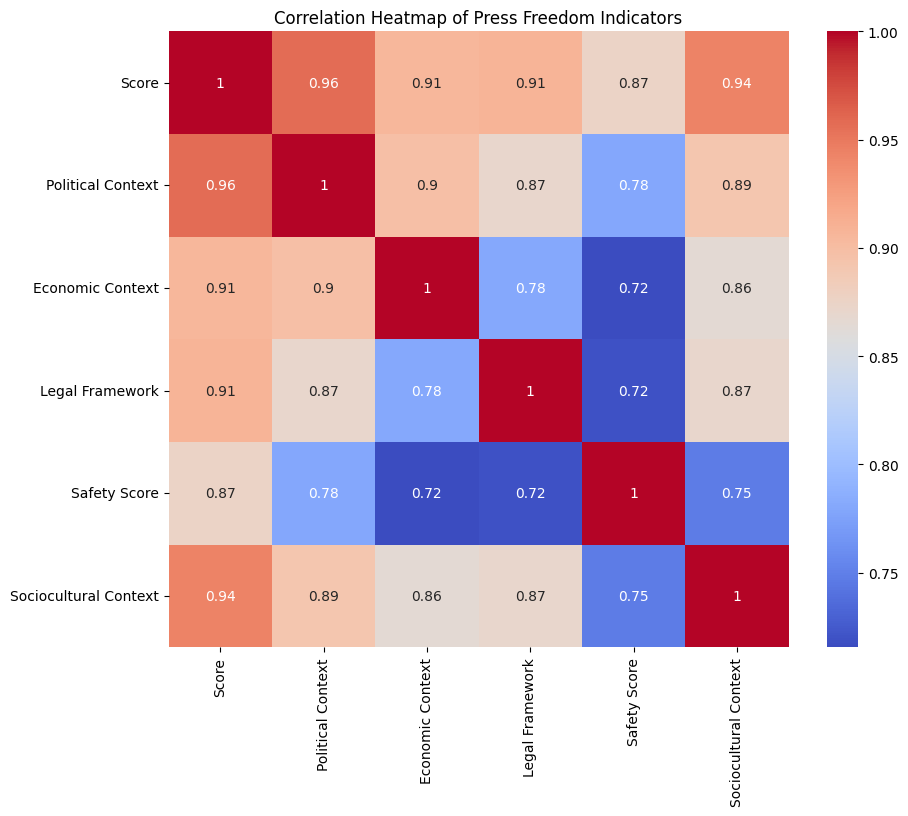

'Description: This is a correlation heatmap of the different indicators of press freedom. The colors represent the correlation coefficients between each pair of indicators: darker red colors indicate stronger positive correlations, while darker blue colors indicate stronger negative correlations. All indicators show positive correlations with each other, indicating that they tend to increase and decrease together.'

In [ ]:
# Calculating the correlation matrix using Spearman correlation
corr_matrix, _ = spearmanr(rsf_data[score_columns])

# Creating a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=score_columns, yticklabels=score_columns)
plt.title('Correlation Heatmap of Press Freedom Indicators')
plt.show()

"""Description: This is a correlation heatmap of the different indicators of press freedom. The colors represent the correlation coefficients between each pair of indicators: darker red colors indicate stronger positive correlations, while darker blue colors indicate stronger negative correlations. All indicators show positive correlations with each other, indicating that they tend to increase and decrease together."""


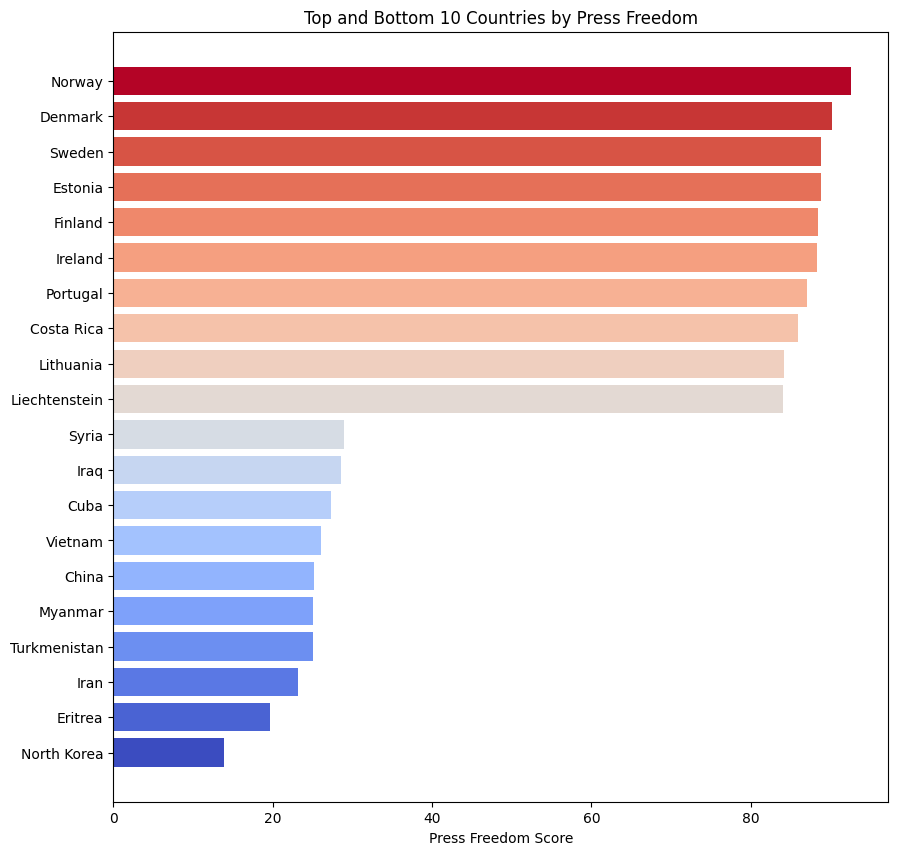

In [9]:
# Sort by 'Score' column in descending order and reset the index
rsf_data = rsf_data.sort_values('Score', ascending=False).reset_index(drop=True)

# Select top 10 and bottom 10 countries
top_10 = rsf_data.head(10)
bottom_10 = rsf_data.tail(10)

# Concatenate top and bottom dataframes
combined_data = pd.concat([top_10, bottom_10])

# Create a bar plot with color gradation
plt.figure(figsize=(10, 10))

# Create color list with gradation from green to red
colors = list(reversed([mcolors.rgb2hex(cm.coolwarm(i)) for i in np.linspace(0, 1, 20)]))

plt.barh(combined_data['Country'], combined_data['Score'], color=colors)
plt.xlabel('Press Freedom Score')
plt.title('Top and Bottom 10 Countries by Press Freedom')
plt.gca().invert_yaxis()  # to display the country with highest score at the top
plt.show()

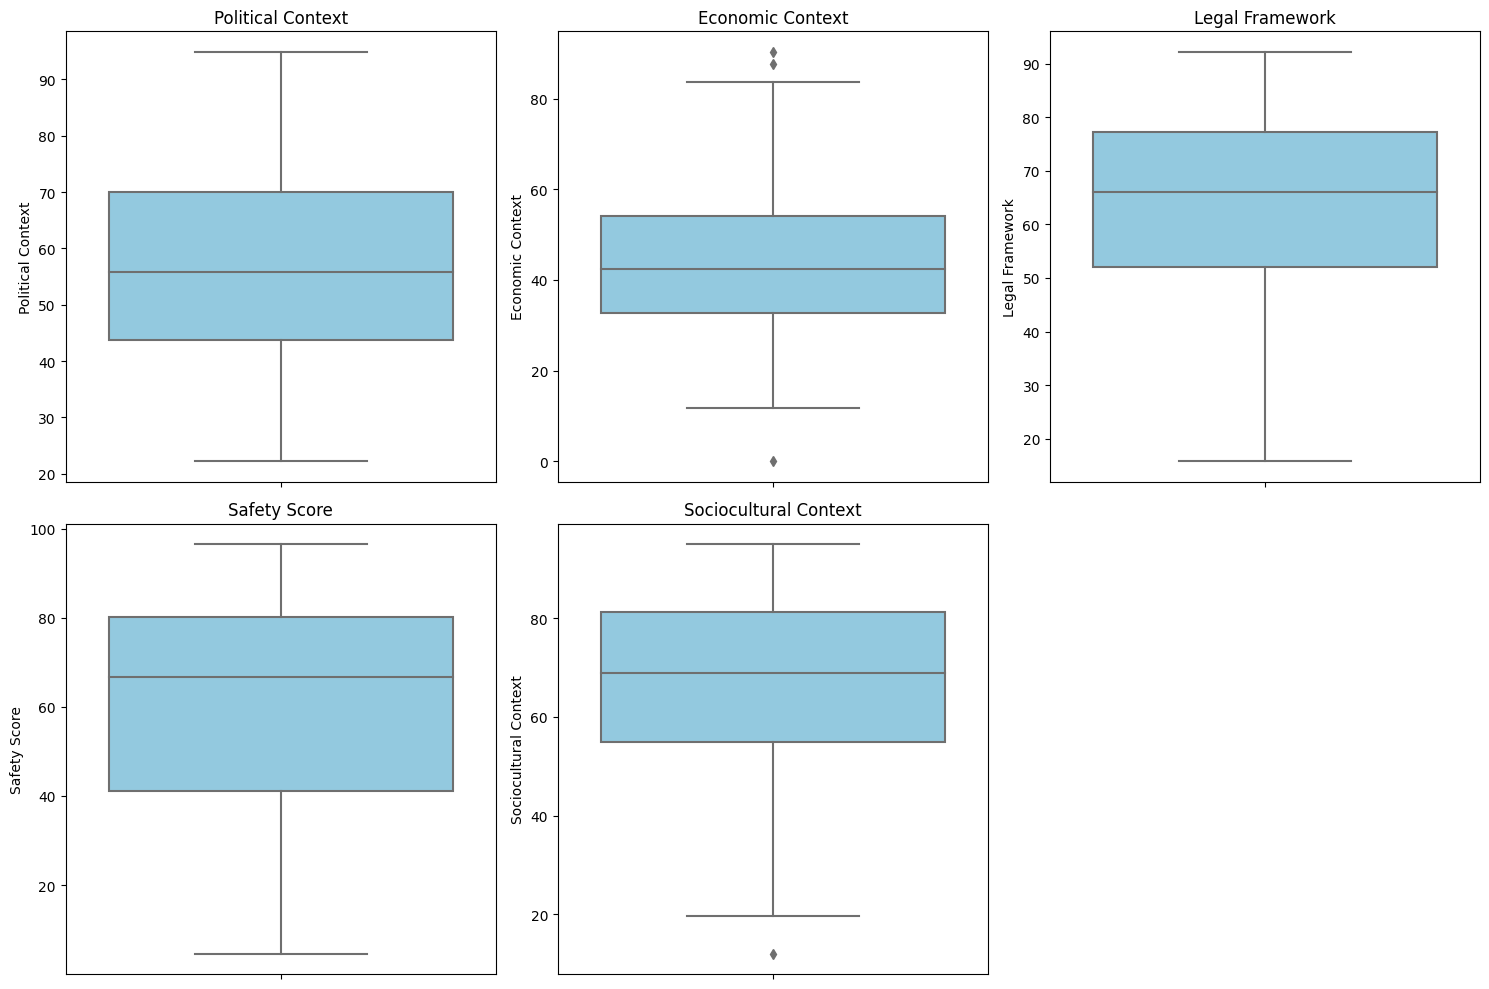

'Description: The box plots provide a visual representation of the distributions of the individual indicators of press freedom. Each box shows the interquartile range (IQR, the range from the 25th percentile to the 75th percentile), with the line inside the box representing the median.'

In [ ]:
# Creating box plots for each of the indicators
plt.figure(figsize=(15, 10))
for i, col in enumerate(score_columns[1:], start=1):  # Skip the first column ('Score') as it's a composite of the others
    plt.subplot(2, 3, i)
    sns.boxplot(y=col, data=rsf_data, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()
"""Description: The box plots provide a visual representation of the distributions of the individual indicators of press freedom. Each box shows the interquartile range (IQR, the range from the 25th percentile to the 75th percentile), with the line inside the box representing the median."""

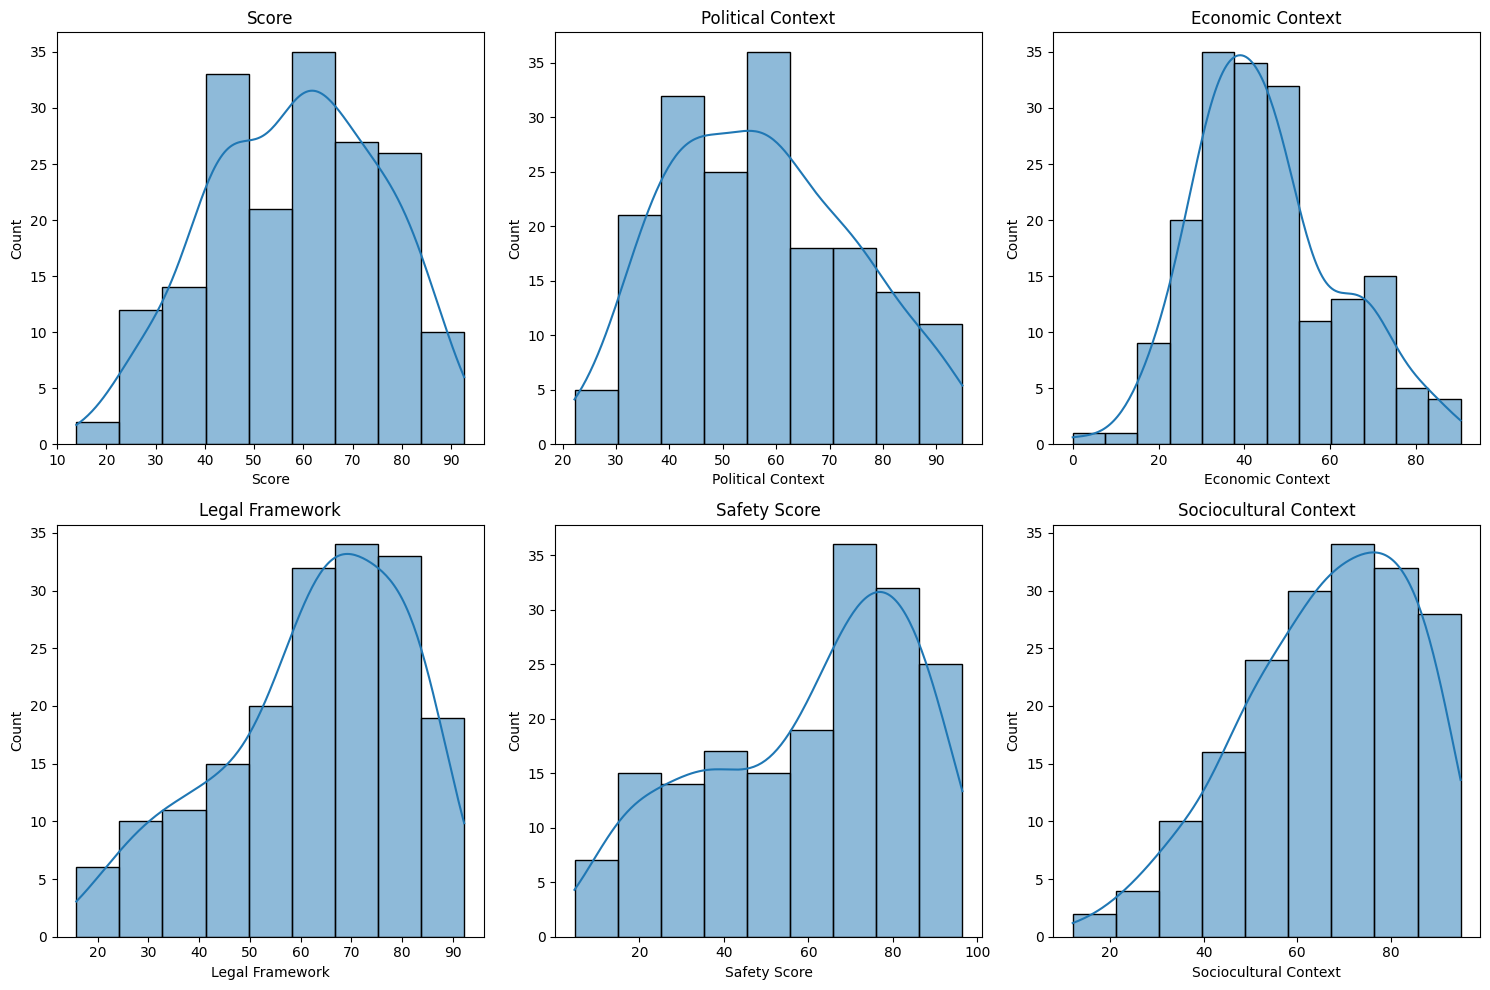

'Description: The histograms allow us to visualize the distributions of the score variables.'

In [ ]:
# Creating histograms for each of the score variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(score_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(rsf_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()
"""Description: The histograms allow us to visualize the distributions of the score variables."""



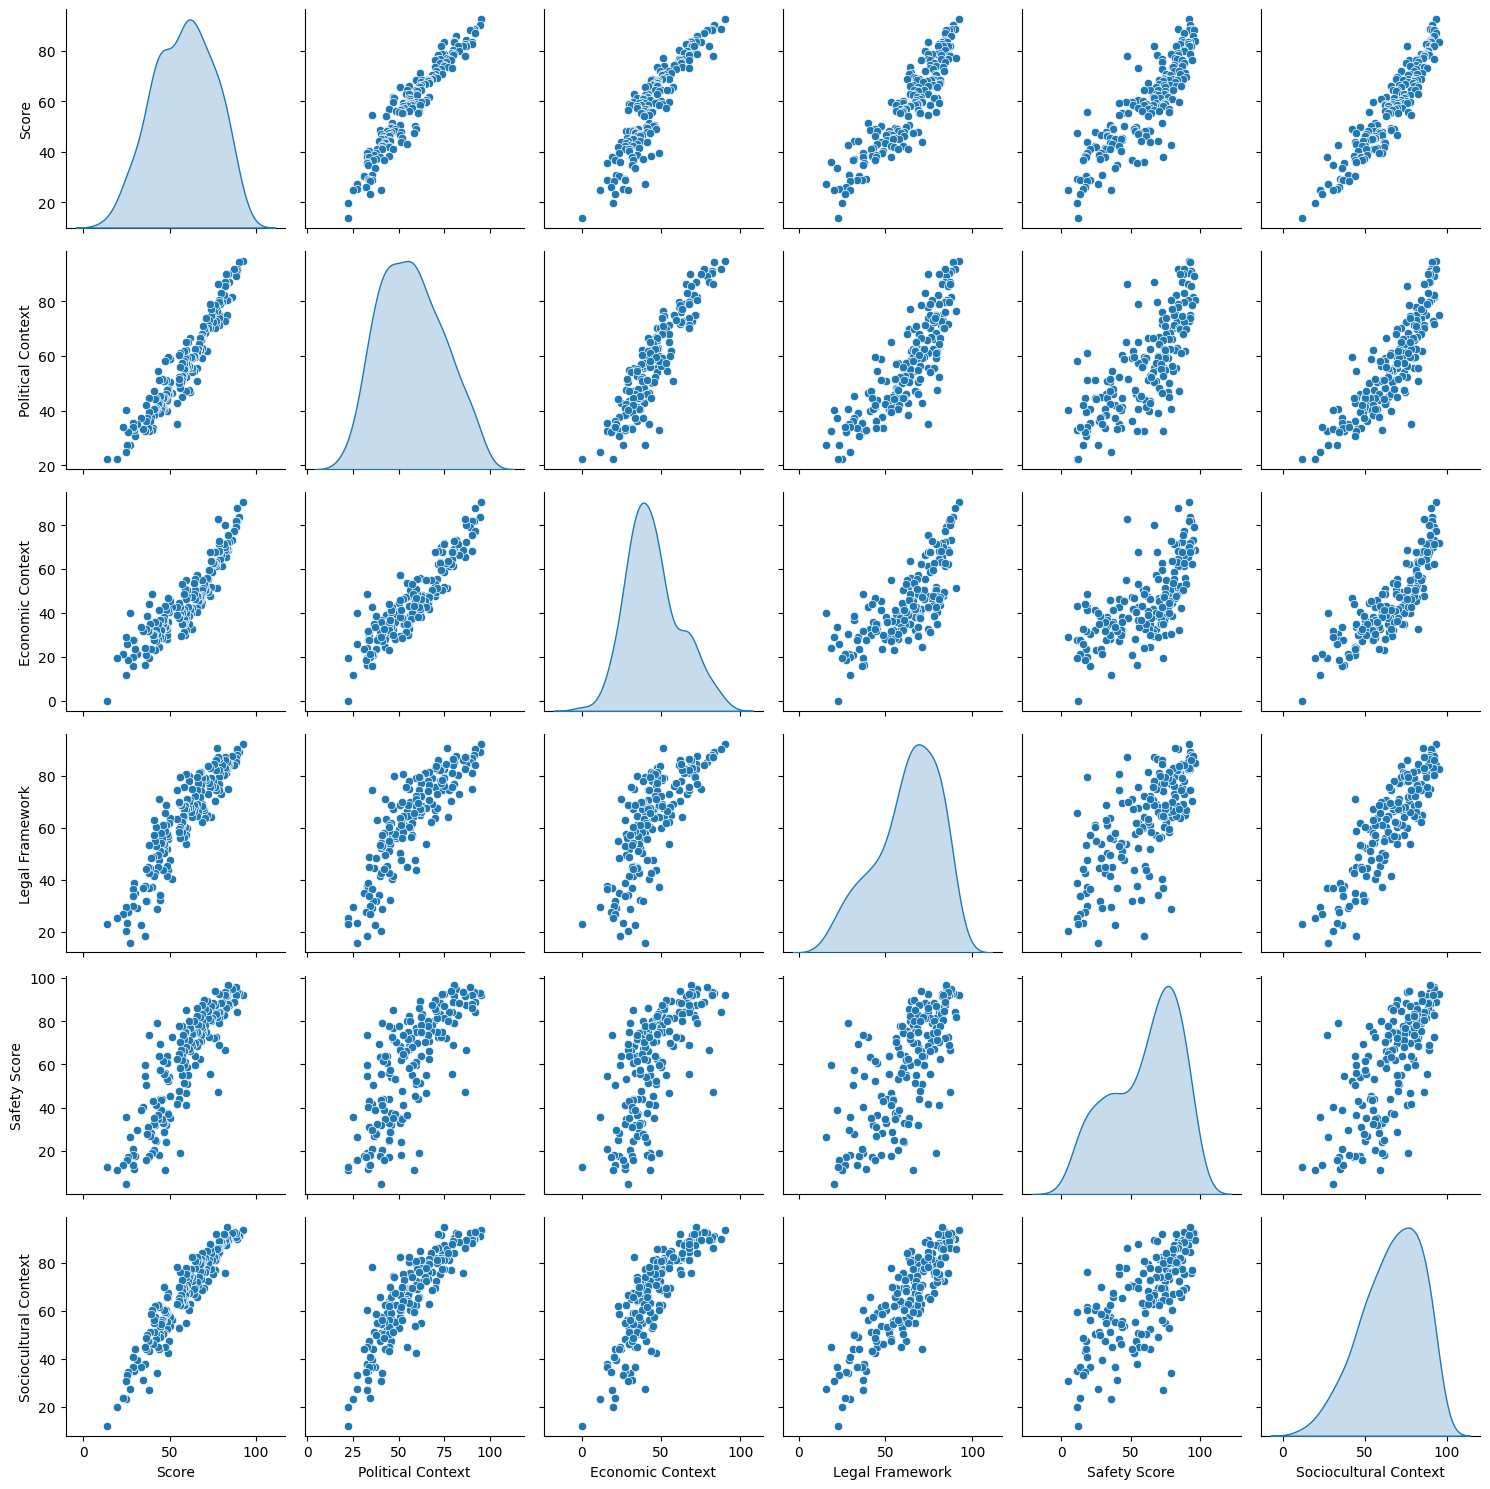

'Description: The pair plot shows the relationships between all pairs of indicators. Each point represents a country, plotted based on its scores on two indicators. The diagonal of the plot shows the distribution of each indicator.'

In [ ]:
# Creating the pair plot
sns.pairplot(rsf_data[score_columns], diag_kind='kde')
plt.tight_layout()
plt.show()
"""Description: The pair plot shows the relationships between all pairs of indicators. Each point represents a country, plotted based on its scores on two indicators. The diagonal of the plot shows the distribution of each indicator."""